In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#####
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# 載入檔案
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# 資料清理 清掉類別型態資料 (只能有連續變項)
df = df.drop(['car_ID'], axis=1)
df = df.drop(['CarName'], axis=1) #汽車公司名稱
df = df.drop(['fueltype'], axis=1) #汽車燃料類型，即汽油或柴油
df = df.drop(['aspiration'], axis=1) #汽車用吸塵器
df = df.drop(['doornumber'], axis=1) #汽車的門數
df = df.drop(['carbody'], axis=1) #車體
df = df.drop(['drivewheel'], axis=1) #主動輪類型
df = df.drop(['enginelocation'], axis=1) #汽車發動機的位置
df = df.drop(['enginetype'], axis=1) #發動機類型
df = df.drop(['cylindernumber'], axis=1) #放置在汽車中的氣瓶
df = df.drop(['fuelsystem'], axis=1) #汽車燃油系統
df = df.drop(['boreratio'], axis=1) #汽車鑽孔


# 使用LabelEncoder將標籤轉為對應數值
lb = LabelEncoder()
#lb.fit(df['CarName'].drop_duplicates()) 
#df['CarName'] = lb.transform(df['aspiration'])

#lb.fit(df['fueltype'].drop_duplicates()) 
#df['fueltype'] = lb.transform(df['aspiration'])

#lb.fit(df['aspiration'].drop_duplicates()) 
#df['aspiration'] = lb.transform(df['aspiration'])

#lb.fit(df['doornumber'].drop_duplicates()) 
#df['doornumber'] = lb.transform(df['doornumber'])

#lb.fit(df['carbody'].drop_duplicates()) 
#df['carbody'] = lb.transform(df['carbody'])

#lb.fit(df['drivewheel'].drop_duplicates()) 
#df['drivewheel'] = lb.transform(df['drivewheel'])

#lb.fit(df['enginelocation'].drop_duplicates()) 
#df['enginelocation'] = lb.transform(df['enginelocation'])

#lb.fit(df['enginetype'].drop_duplicates()) 
#df['enginetype'] = lb.transform(df['enginetype'])

#lb.fit(df['cylindernumber'].drop_duplicates()) 
#df['cylindernumber'] = lb.transform(df['cylindernumber'])

#lb.fit(df['fuelsystem'].drop_duplicates()) 
#df['fuelsystem'] = lb.transform(df['fuelsystem'])

df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.40,8.0,115,5500,18,22,17450.0


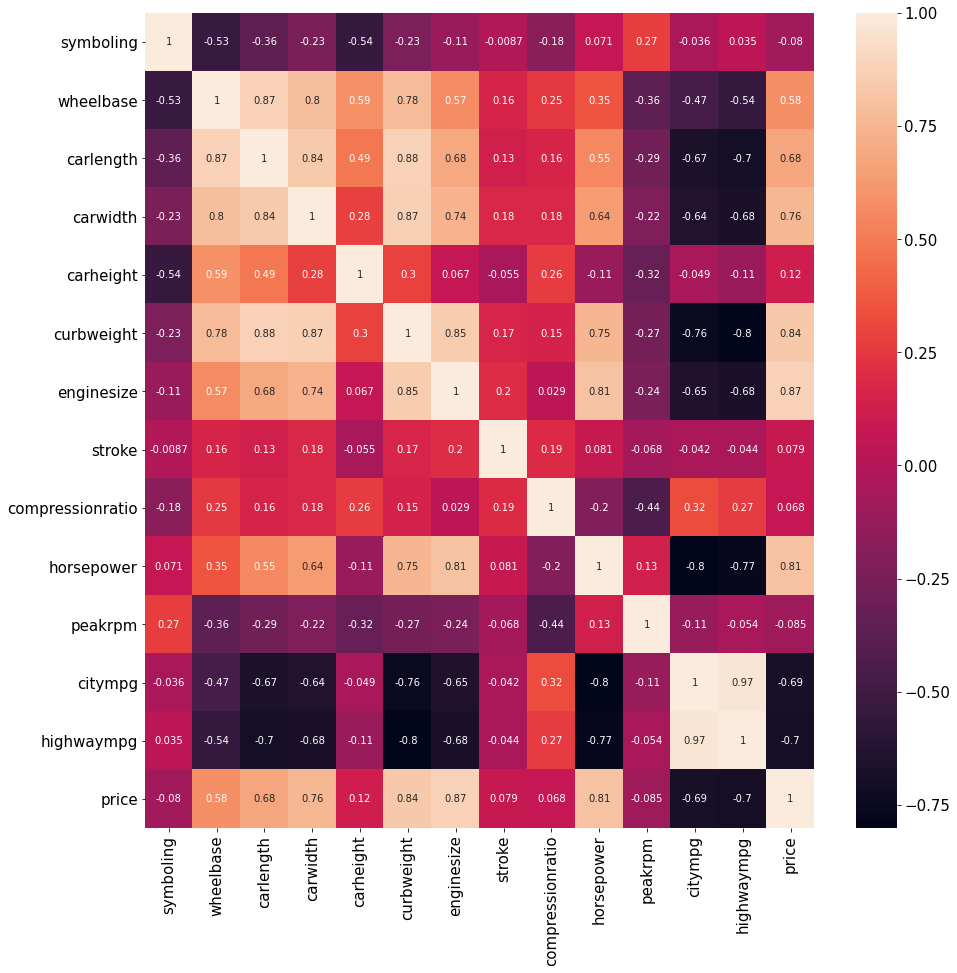

In [5]:
# 相關係數
corr = df.corr()
large = 15 ;med = 15; small = 15
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (15, 15),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)

In [6]:
from sklearn.model_selection import train_test_split

# 選擇需要欄位
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 切分資料為 訓練8:測試2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 載入模型
import math
ln = LinearRegression()
ln.fit(X_train, y_train)

# 預測
ln_predict = ln.predict(X_test)

num_data = X_train.shape[0]

# 模型效能指標
ln_mse = mean_squared_error(y_test, ln_predict, squared=False)
ln_rse = math.sqrt(ln_mse/(num_data-2))
ln_r2 = r2_score(y_test, ln_predict)

print("ln_mse={}".format(ln_mse))
print("ln_rse={}".format(ln_rse))
print("ln_r2={}".format(ln_r2))

ln_mse=3800.257304151221
ln_rse=4.843385016771489
ln_r2=0.8170608056591133


In [8]:
import math
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

num_data = X_train.shape[0]

rfr_predict = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_predict, squared=False)
rfr_rse = math.sqrt(rfr_mse/(num_data-2))
rfr_r2 = r2_score(y_test, rfr_predict)

print("rfr_mse={}".format(rfr_mse))
print("rfr_rse={}".format(rfr_rse))
print("rfr_r2={}".format(rfr_r2))

rfr_mse=1744.3937626678633
rfr_rse=3.2814421726609284
rfr_r2=0.9614548440106293


In [9]:
X_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

[Text(558.0, 475.65000000000003, 'enginesize <= 182.0\nmse = 50990231.299\nsamples = 109\nvalue = 12284.064'),
 Text(279.0, 339.75, 'curbweight <= 2697.5\nmse = 18631200.457\nsamples = 102\nvalue = 10733.608'),
 Text(139.5, 203.85000000000002, 'curbweight <= 2216.5\nmse = 6601345.763\nsamples = 78\nvalue = 8885.871'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'peakrpm <= 5100.0\nmse = 12084897.439\nsamples = 24\nvalue = 16526.514'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'compressionratio <= 8.9\nmse = 2570640.682\nsamples = 7\nvalue = 33849.5'),
 Text(697.5, 203.85000000000002, 'citympg <= 15.5\nmse = 781219.84\nsamples = 3\nvalue = 35246.4'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'compressionratio <= 9.75\nmse = 108

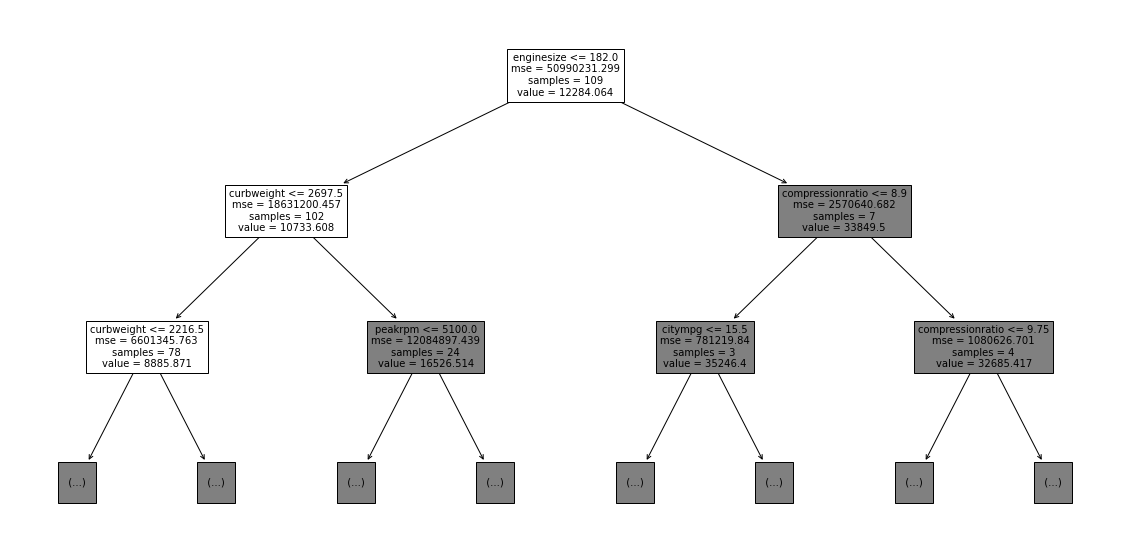

In [10]:
f, ax = plt.subplots(figsize=(20, 10))
plot_tree(rfr.estimators_[0], max_depth=2, ax=ax, feature_names=X_train.columns)

In [11]:
import math
ann = MLPRegressor(batch_size=10 ,learning_rate_init=1e-1 ,random_state=42)
ann.fit(X_train, y_train)

num_data = X_train.shape[0]

ann_predict = ann.predict(X_test)
ann_mse = mean_squared_error(y_test, ann_predict, squared=False)
ann_rse = math.sqrt(ann_mse/(num_data-2))
ann_r2 = r2_score(y_test, ann_predict)

print("ann_mse={}".format(ann_mse))
print("ann_rse={}".format(ann_rse))
print("ann_r2={}".format(ann_r2))

ann_mse=5394.942287213314
ann_rse=5.77079828828151
ann_r2=0.6313159380780626


In [12]:
!pip install eli5
import eli5 as eli5
eli5.show_weights(rfr, feature_names=X_train.columns.tolist())

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.5476 ± 0.4023,enginesize
0.3013 ± 0.3873,curbweight
0.0481 ± 0.2107,highwaympg
0.0360 ± 0.1763,horsepower
0.0155 ± 0.0605,carwidth
0.0105 ± 0.0274,carlength
0.0080 ± 0.0512,wheelbase
0.0074 ± 0.0169,peakrpm
0.0074 ± 0.0186,citympg
0.0063 ± 0.0104,stroke


In [13]:
from eli5 import show_prediction 
eli5.show_prediction(rfr, X_train.iloc[1],show_feature_values=True)

In [14]:
import eli5 as eli5
eli5.show_weights(ln, feature_names=X_train.columns.tolist())

Weight?,Feature
+527.673,carwidth
+359.959,compressionratio
+224.117,highwaympg
+208.518,symboling
+201.173,carheight
+139.043,wheelbase
+123.510,enginesize
+16.976,horsepower
+2.647,peakrpm
+0.441,curbweight


In [15]:
from eli5 import show_prediction 
eli5.show_prediction(ln, X_train.iloc[1],show_feature_values=True)